# Random Forest_class_sudhanshu 
Practical implementation on multi-Classification problem </br>
Topics Covered:
- Random Forest
- Bagging Classifier

###  Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Seperate dependent and independent features

In [4]:
x = df.iloc[:,:-1]
y = df['quality']

In [5]:
from sklearn.ensemble import BaggingClassifier

### Train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x , y , random_state=0 )
## If you dont mention the test size by default it will split into 75:20 ratio

In [7]:
x_train.shape,y_train.shape

((1199, 11), (1199,))

In [8]:
x_test.shape,y_test.shape

((400, 11), (400,))

### Bagging Classifier
- we are creating one bag and inside which we are creating many models
- When we are creating any model in bagging, our base model can be anything
- After that there can be multiple decision makers and that decision makers can give me decision

- Here below we are making Bagging classifier using decision tree

In [9]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

- `n_estimators :` no of models we are creating inside bag

In [10]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

![](https://i.imgur.com/yHdjJHW.jpg)

In [11]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 5, 7,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 7,
       5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 5, 7, 6, 6, 4, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 5, 7, 6, 6, 5, 5, 6, 5, 7, 7, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6,
       5, 7, 7, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 4, 5, 7, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 7, 5, 7, 5, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [12]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [13]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [14]:
bag_dt.estimator_params

()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

- Bagging classifier using KNeightborsClassifier (KNN)

In [16]:
# Inside baggineclassifier we can build a model where multiple KNN model can make a decision, so it is also possible 
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)
# KNeighborsClassifier(6) = number of neighbours 6
# n_estimators = 10 Total number of KNN classifiers to use

In [17]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

![](https://i.imgur.com/pXu8XxB.jpg)

In [18]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7, 6, 7, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 7, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 5, 7, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5, 7, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 7, 7, 6,
       5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 7, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 6, 5, 7, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

### Random|Forrest|Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()

In [46]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
## test accuracy using score
rf.score(x_test,y_test)

0.7125

In [49]:
## Test accuracy using accuracy_score 
rf_pred = rf.predict(x_test)
accuracy_score(y_test,rf_pred)

0.7125

- Both ways accuracy is same

In [24]:
## check accuracy score of bagging using decision tree with n_esitmator = 10
bag_dt.score(x_test,y_test)

0.64

In [25]:
## check accuracy score of bagging using decision tree with n_esitmator = 100
bag_dt_100 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
bag_dt_100.fit(x_train,y_train)
bag_dt_100.score(x_test,y_test)

0.67

In [26]:
## check accuracy score of bagging using KNN with n_esitmator = 10
bag_knn.score(x_test,y_test)

0.5

### Observation 
1. if we see accuracy using .score(x_test,y_test) or accuracy_score(y_test,rf_pred) but will give the same result
2. Accuracy score of bagging using decision tree with n_esitmator = 100 is approximately same as score of bagging using random forest because in random forrest by default n_estimator = 100
3. accuracy score of bagging using KNN with n_esitmator = 10 is 49%. This can be beause KNN works on the number of neighbours . here we have given parameter as 6 to KNN, may be if we change the number of neibours in KNN we get different accuracy

### Plot RandomForest with 5 decision tree in it

In [27]:
# here we have made model of random forrest with 5 decision tree
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [28]:
rf1.estimators_
## These are the 5 decision trees

[DecisionTreeClassifier(max_features='sqrt', random_state=502942452),
 DecisionTreeClassifier(max_features='sqrt', random_state=2009392561),
 DecisionTreeClassifier(max_features='sqrt', random_state=338122631),
 DecisionTreeClassifier(max_features='sqrt', random_state=205512733),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277114100)]

In [29]:
## Excess 1 estimator
rf1.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=502942452)

[Text(0.6112160240202276, 0.9736842105263158, 'X[10] <= 10.525\ngini = 0.637\nsamples = 762\nvalue = [6, 29, 543, 447, 164, 10]'),
 Text(0.44311788874841973, 0.9210526315789473, 'X[6] <= 82.5\ngini = 0.521\nsamples = 482\nvalue = [1, 16, 469, 241, 36, 1]'),
 Text(0.3454013906447535, 0.868421052631579, 'X[2] <= 0.405\ngini = 0.569\nsamples = 368\nvalue = [1, 16, 316, 223, 35, 1]'),
 Text(0.24099241466498103, 0.8157894736842105, 'X[1] <= 0.572\ngini = 0.534\nsamples = 284\nvalue = [1, 14, 265, 150, 16, 1]'),
 Text(0.15752212389380532, 0.7631578947368421, 'X[4] <= 0.083\ngini = 0.562\nsamples = 137\nvalue = [0, 3, 105, 105, 11, 1]'),
 Text(0.12288242730720607, 0.7105263157894737, 'X[2] <= 0.345\ngini = 0.558\nsamples = 97\nvalue = [0, 3, 84, 59, 8, 1]'),
 Text(0.08394437420986094, 0.6578947368421053, 'X[9] <= 0.645\ngini = 0.574\nsamples = 83\nvalue = [0, 2, 65, 57, 8, 1]'),
 Text(0.03640960809102402, 0.6052631578947368, 'X[4] <= 0.062\ngini = 0.49\nsamples = 60\nvalue = [0, 2, 57, 34, 0,

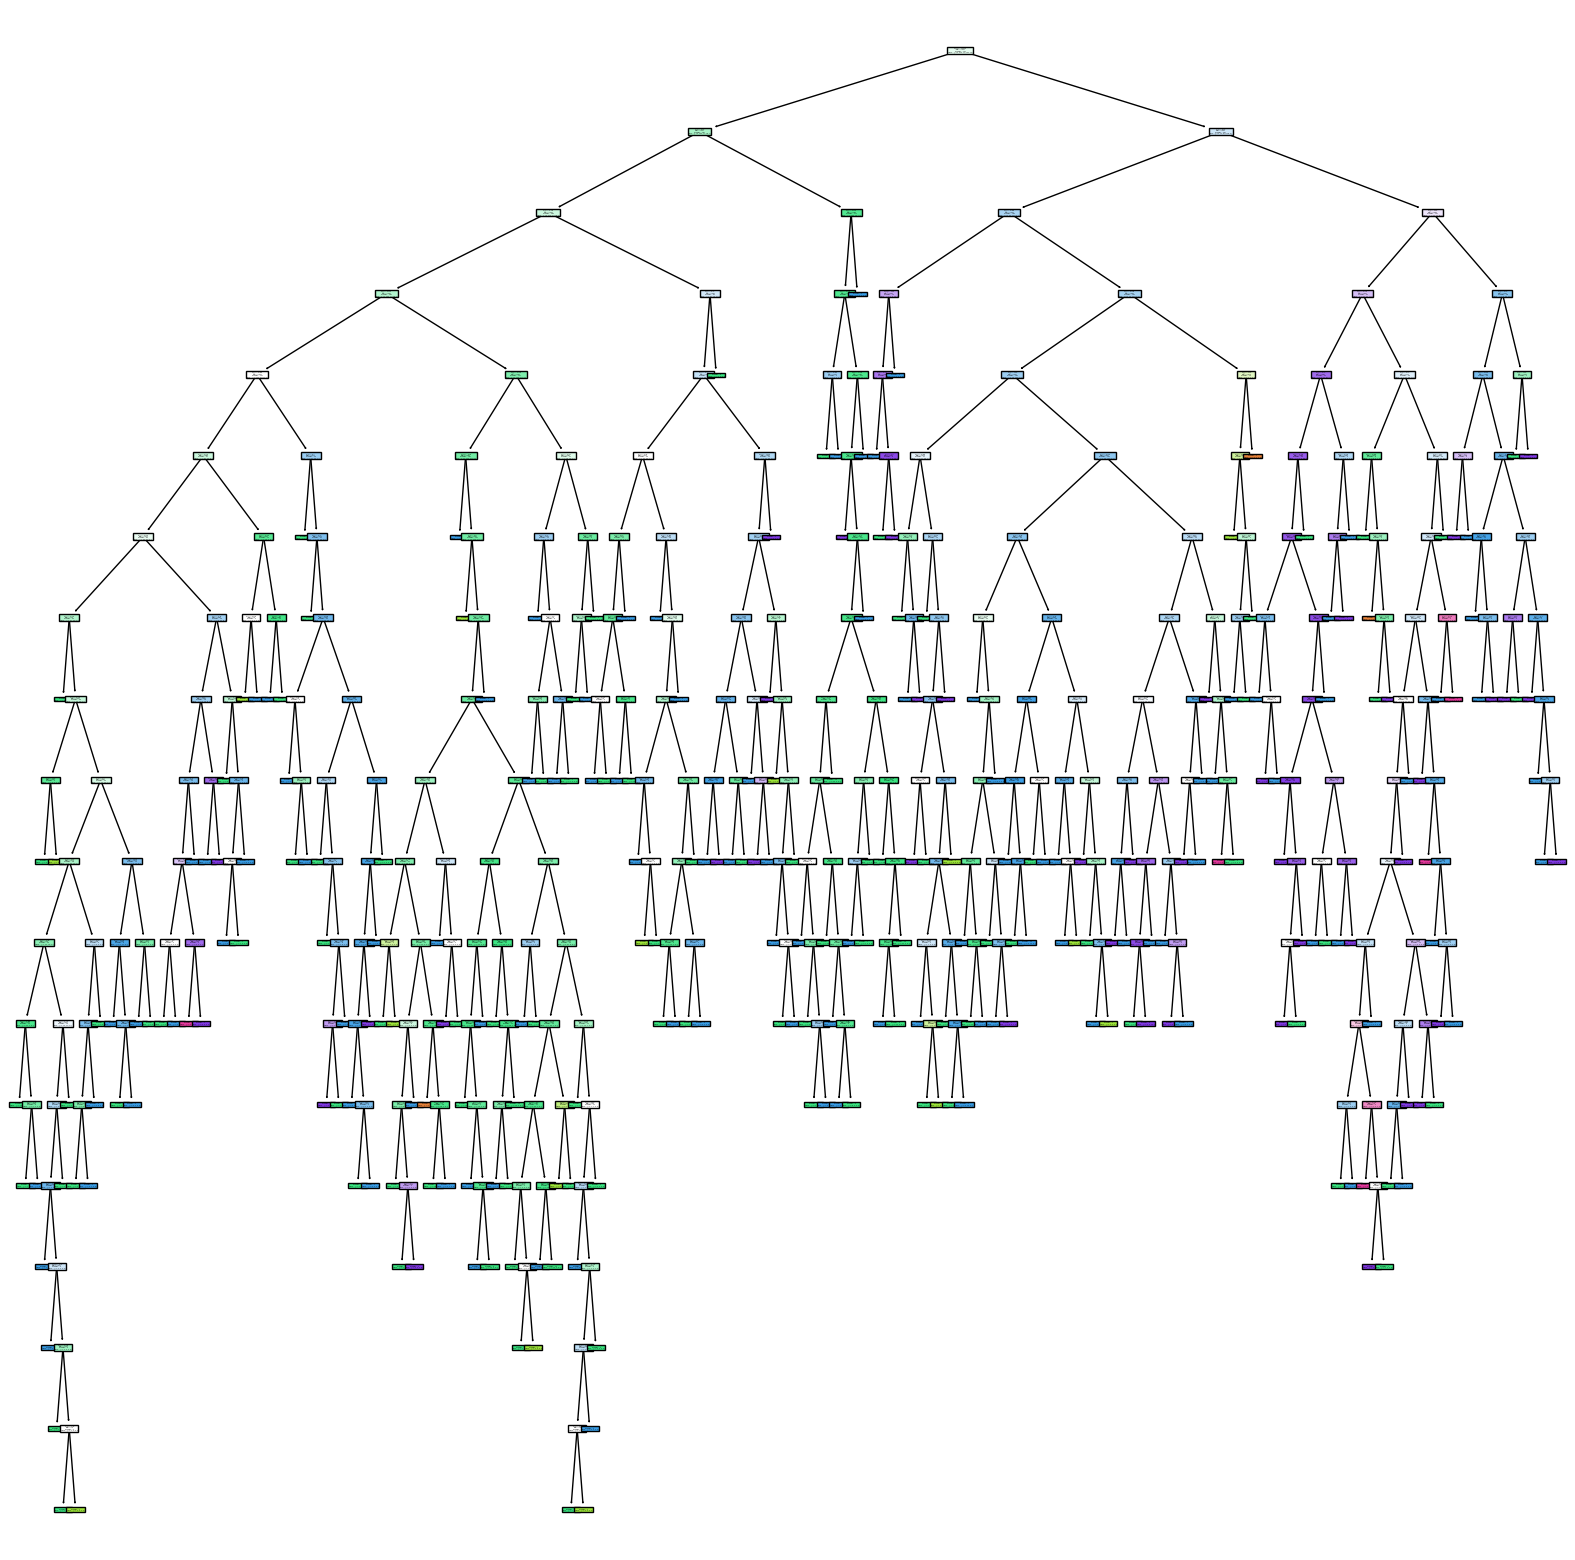

In [30]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf1.estimators_[0],filled=True)

- We have plot 1st decison tree out ouf 5 decision trees in random forest

[Text(0.7342680267226148, 0.9736842105263158, 'X[6] <= 92.5\ngini = 0.651\nsamples = 774\nvalue = [11, 40, 502, 471, 162, 13]'),
 Text(0.5012215658127208, 0.9210526315789473, 'X[10] <= 10.525\ngini = 0.661\nsamples = 691\nvalue = [11, 39, 404, 451, 159, 13]'),
 Text(0.2431675132508834, 0.868421052631579, 'X[9] <= 0.535\ngini = 0.577\nsamples = 408\nvalue = [7, 24, 339, 254, 27, 3]'),
 Text(0.03729571554770318, 0.8157894736842105, 'X[1] <= 0.345\ngini = 0.412\nsamples = 94\nvalue = [1, 10, 117, 30, 0, 0]'),
 Text(0.007067137809187279, 0.7631578947368421, 'X[7] <= 0.995\ngini = 0.375\nsamples = 6\nvalue = [0, 0, 2, 6, 0, 0]'),
 Text(0.0035335689045936395, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01060070671378092, 0.7105263157894737, 'X[0] <= 8.4\ngini = 0.245\nsamples = 5\nvalue = [0, 0, 1, 6, 0, 0]'),
 Text(0.007067137809187279, 0.6578947368421053, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 5, 0, 0]'),
 Text(0.014134275618374558, 0.6578947368

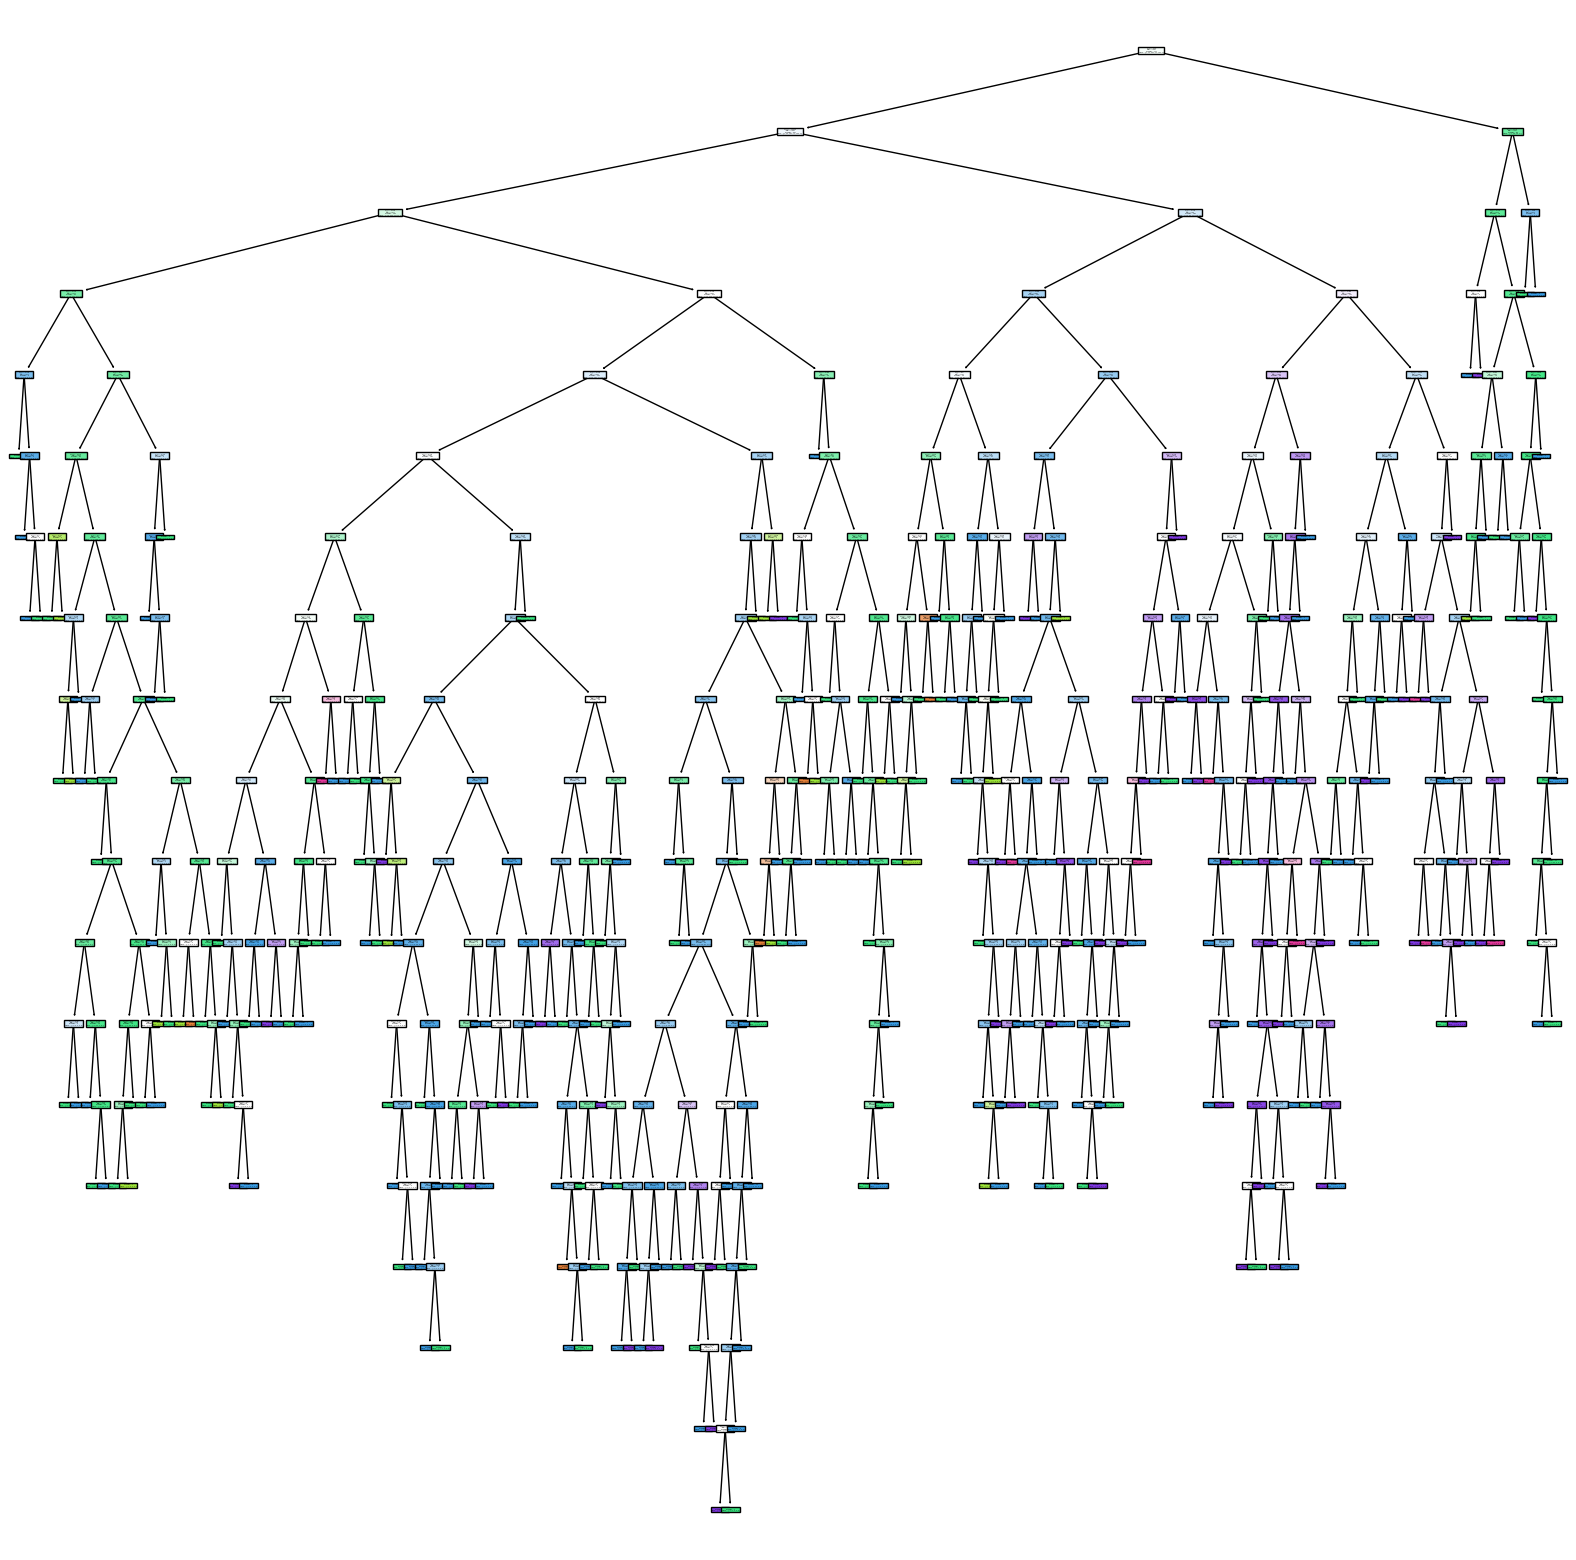

In [31]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf1.estimators_[1],filled=True)

- We have plot 2st decison tree out ouf 5 decision trees in random forest

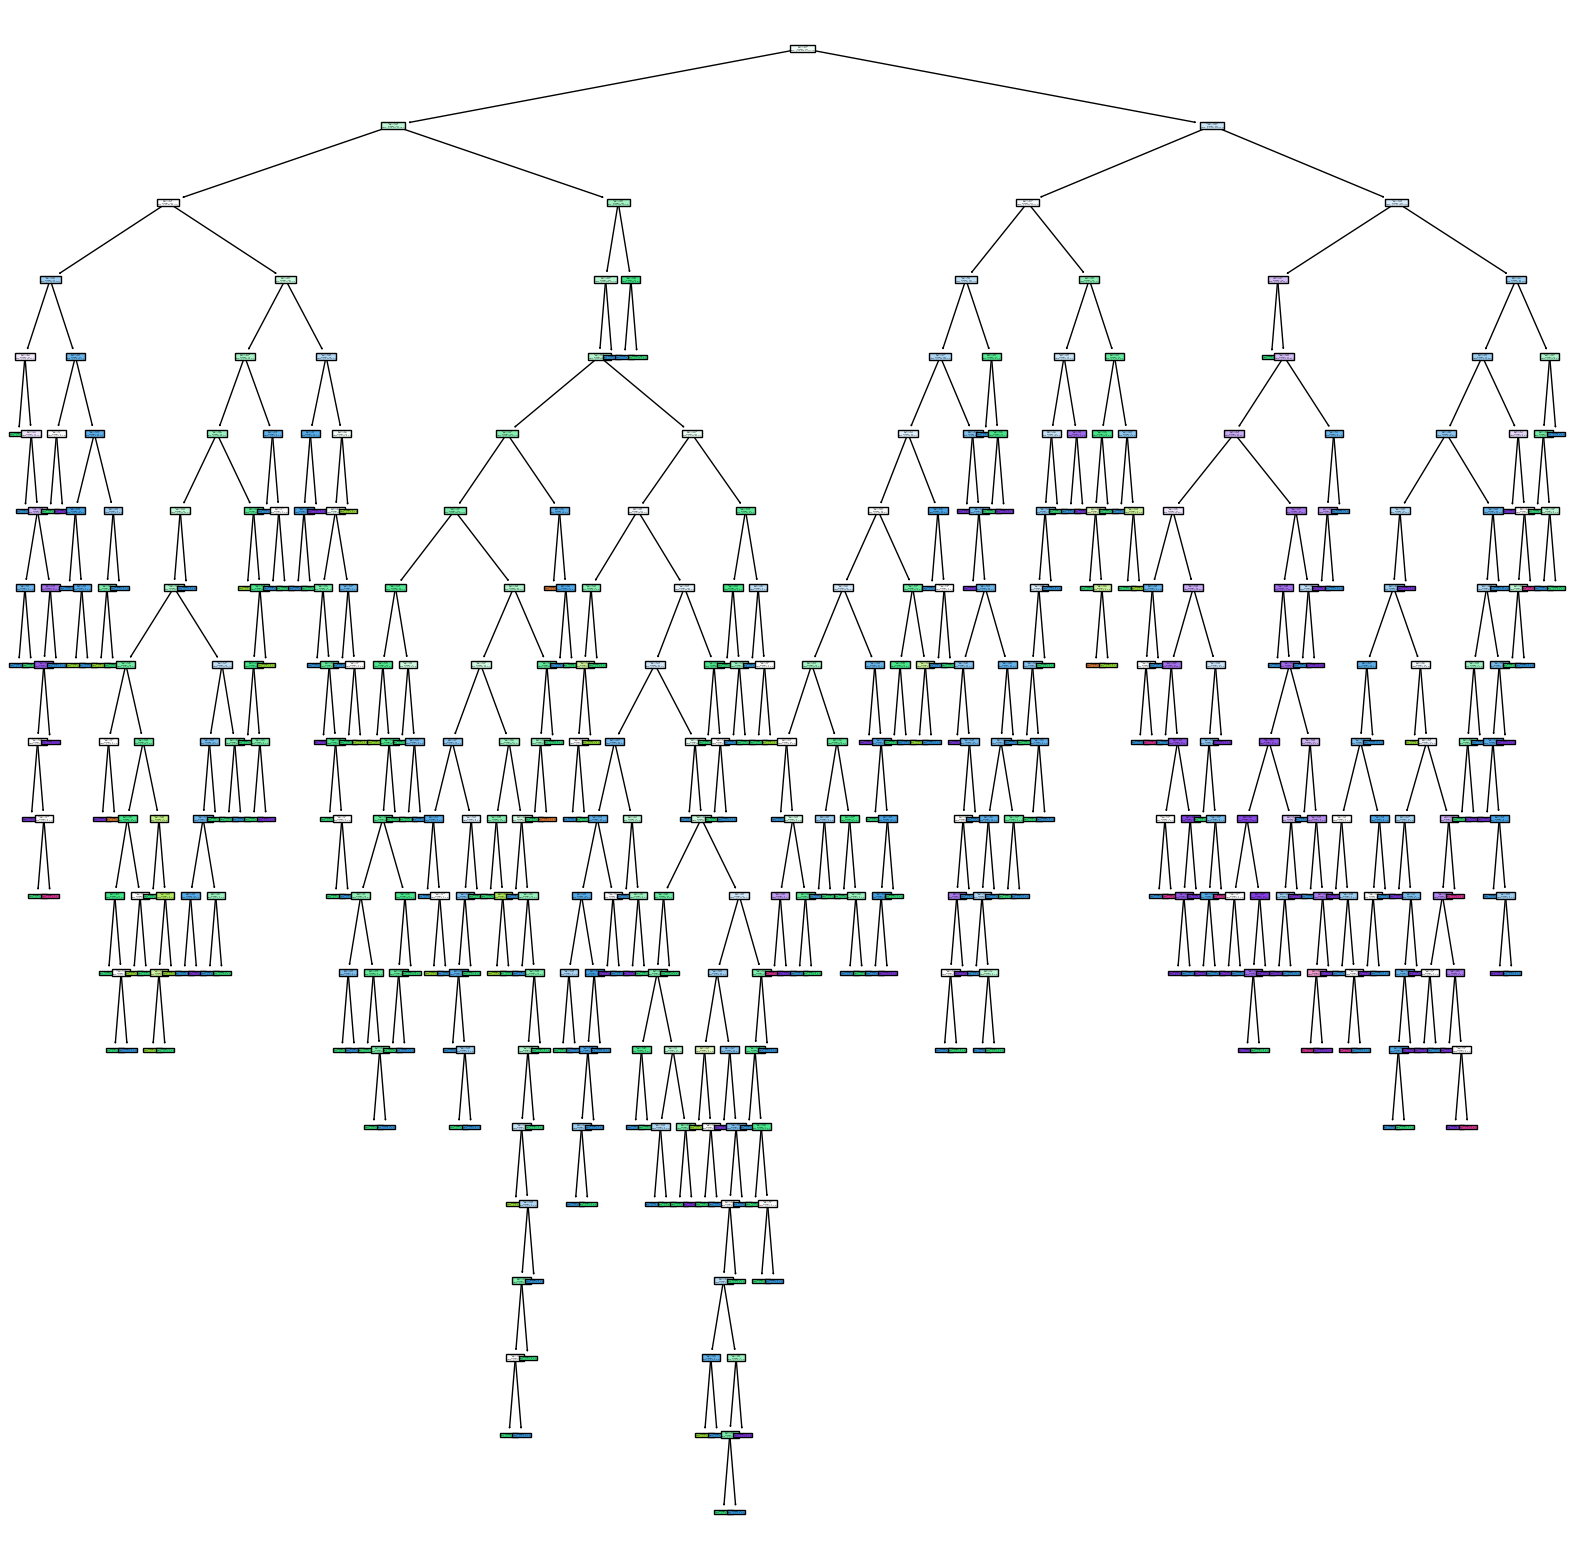

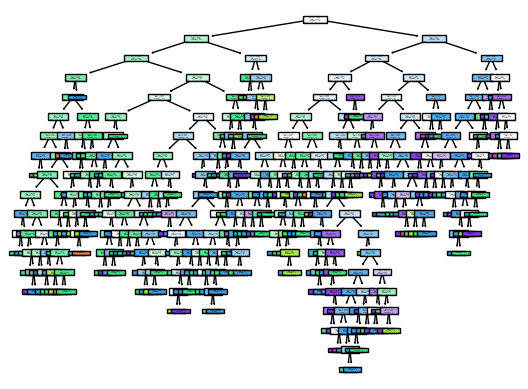

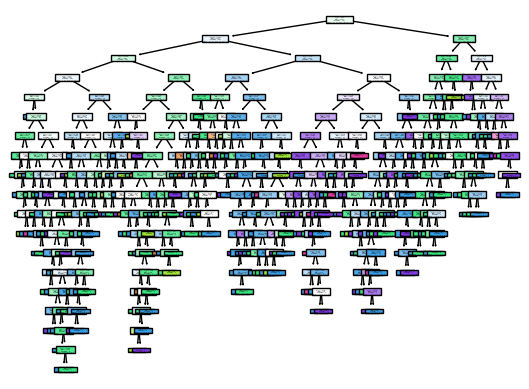

In [32]:
plt.figure(figsize = (20,20))
for i in range(2,5):
    tree.plot_tree(rf1.estimators_[i],filled=True)
    plt.show()

### Hyper-parameter tuning on random forest

In [33]:
grid_param = {
    "n_estimators" : [5,10,50,100,120,150],
    "criterion" : ['gini','entropy'],
    "max_depth" : range(10),
    "min_samples_split" : range(10),
    
}

In [34]:
rf = RandomForestClassifier(n_estimators=5)

In [35]:
grid_search_rf = GridSearchCV(param_grid = grid_param,cv = 10,n_jobs = -1, verbose=1, estimator = rf)

![](https://i.imgur.com/mCDSnno.jpg)

In [36]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


c:\Users\SAHIL JOSAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\SAHIL JOSAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3360 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SAHIL JOSAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_split': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [37]:
## This is the combination of best parameter
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 120}

In [38]:
# create random forest model using these parameters
rf_new = RandomForestClassifier(criterion = "entropy",max_depth = 9,min_samples_split = 2, n_estimators = 120)

In [41]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [42]:
# After hypermater tunning accuracy of Random forest
rf_new.score(x_test,y_test)

0.6725

In [51]:
# Before hypermater tunning accuracy of Random forest
rf.score(x_test,y_test)

0.7125